In [1]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 



x_l = -1
x_r = 1
y_l = -4
y_r = 0
def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N,T=1):
    result_file = f'./Order_{p}_Mesh_{N}/solution/T_{T}_N_{N}.txt'
    # rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
    uh,vh,wh,eh = uh/rh, vh/rh, wh/rh, eh/rh
    # idx = np.argsort(x)
    # x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
    #     (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))

    ph = 0.4*rh*(eh-0.5*uh**2-0.5*vh**2-0.5*wh**2)
    plt.figure(figsize=(7,4.5),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,rh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,5))
    plt.xticks(np.linspace(x_l,x_r,9),minor=True)
    plt.yticks(np.linspace(y_l,y_r,9))
    plt.yticks(np.linspace(y_l,y_r,17),minor=True)
    plt.grid(which='both')
    plt.title(r'$\rho_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.axis('equal')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,(uh**2+vh**2+wh**2)**0.5,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,5))
    plt.xticks(np.linspace(x_l,x_r,9),minor=True)
    plt.yticks(np.linspace(y_l,y_r,9))
    plt.yticks(np.linspace(y_l,y_r,17),minor=True)
    plt.grid(which='both')
    plt.title(r'$\|u_h\|$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.axis('equal')

    # plt.subplot(1,3,3)
    # plt.tripcolor(x,y,ph,cmap='jet')
    # plt.colorbar()
    # plt.xticks(np.linspace(x_l,x_r,6))
    # plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    # plt.yticks(np.linspace(y_l,y_r,6))
    # plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    # plt.grid(which='both')
    # plt.title(r'$p_h$')
    # plt.xlabel(r'$x$')
    # plt.ylabel(r'$y$')

    # plt.suptitle(r'Error of Density, $\|\rho_h-\rho\|/\|\rho\|$=%.2e'%(np.linalg.norm(rh-rs)/np.linalg.norm(rs)))
    plt.tight_layout()
    plt.show()

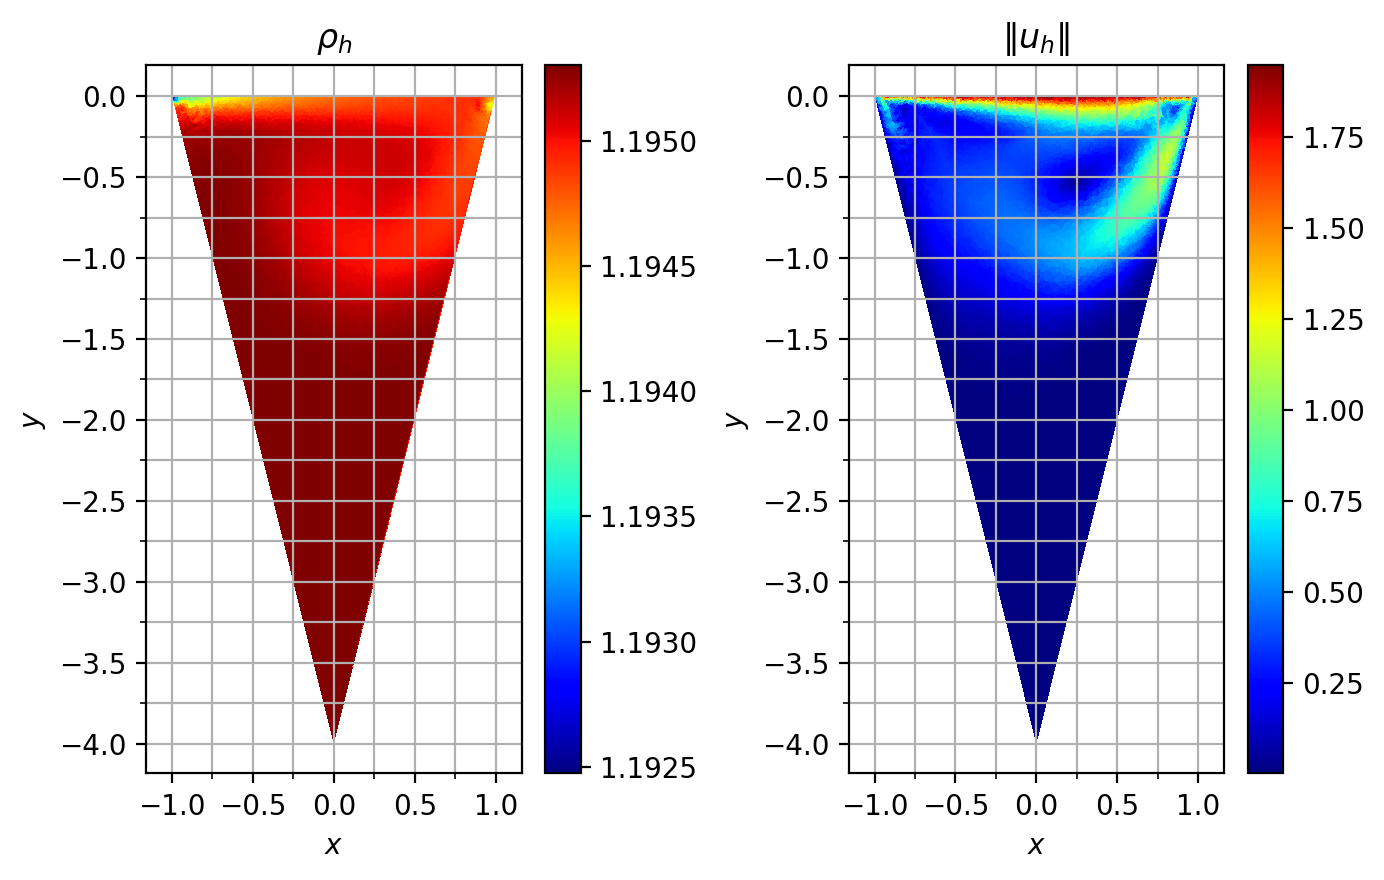

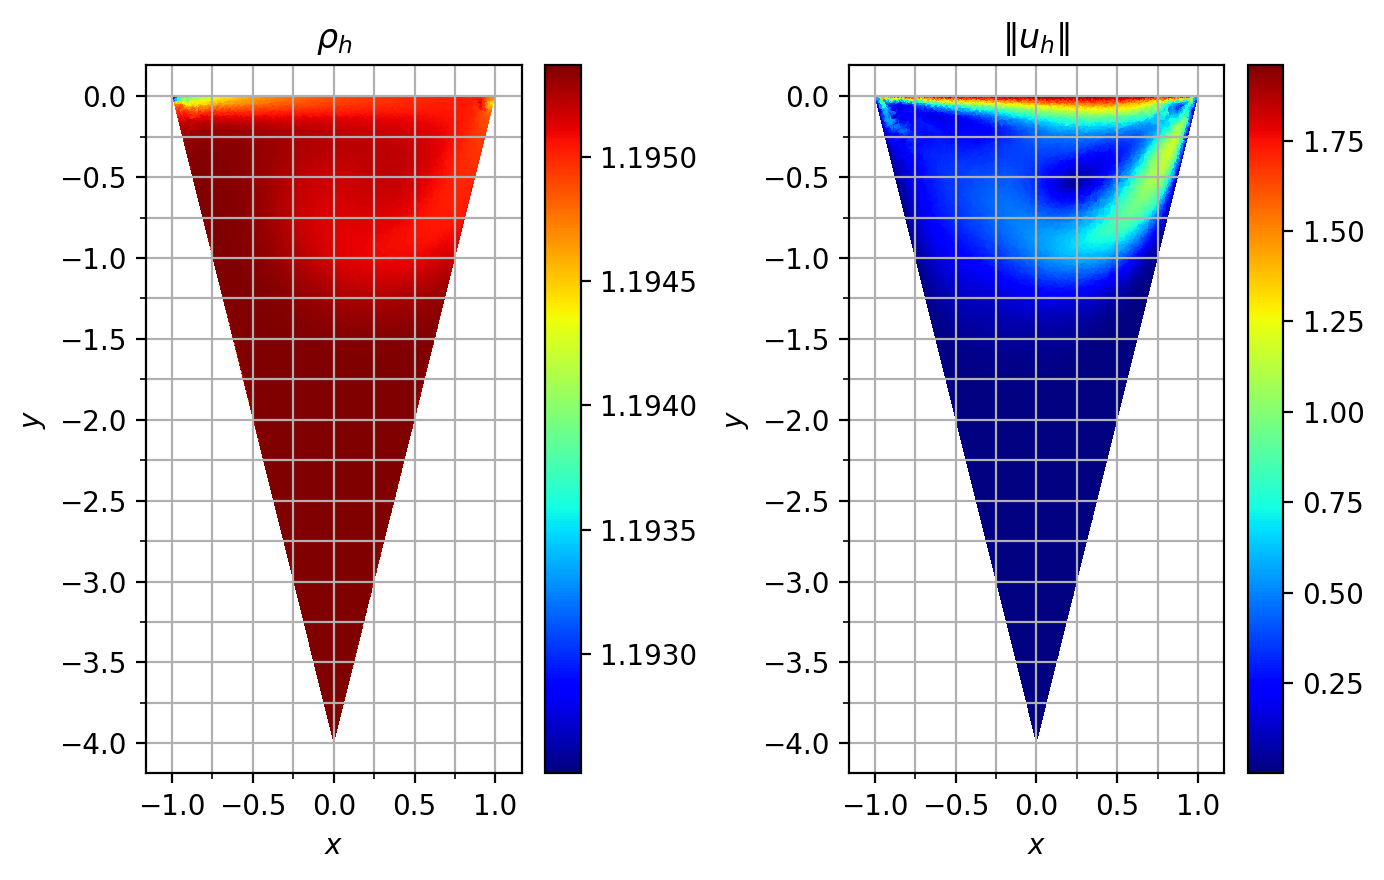

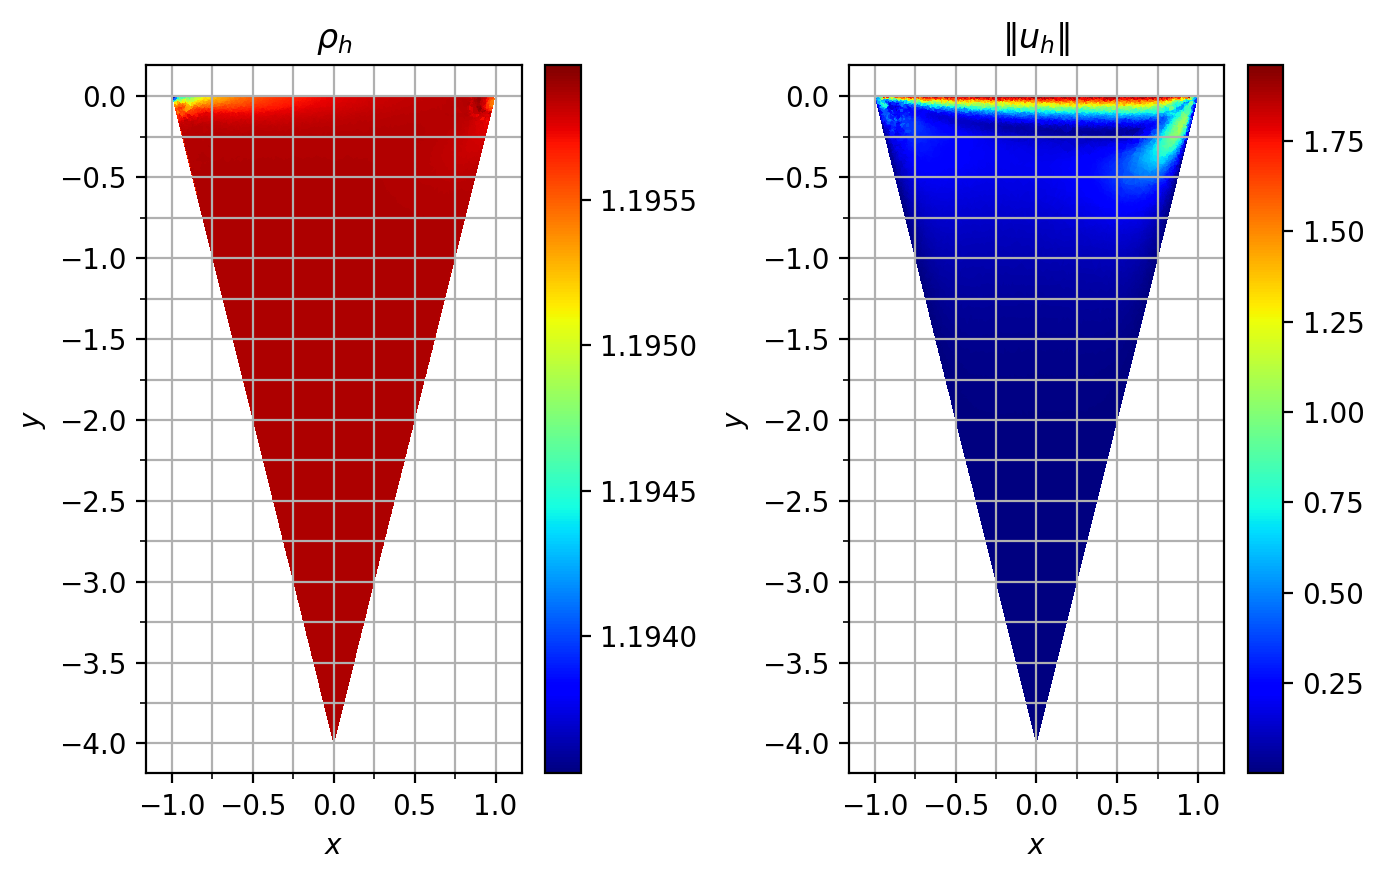

In [9]:
draw(2,10,30)
draw(2,12,30)
draw(3,8,1)

In [21]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 
import scipy.sparse as spmat
mat = np.loadtxt("12345.txt")
idx = np.abs(mat[:,2])>1E-30
row = mat[idx,0].astype(int)
col = mat[idx,1].astype(int)
val = mat[idx,2]
Row = mat[:,0].astype(int).max()+1
mat = spmat.coo_matrix((val,(row,col)), shape=(Row,Row))
mat

<COOrdinate sparse matrix of dtype 'float64'
	with 40888 stored elements and shape (6000, 6000)>

In [23]:
mat.todense()[:20,:20]

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  inf,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [-inf,   0.,   0.,   0.,  inf,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  inf,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 

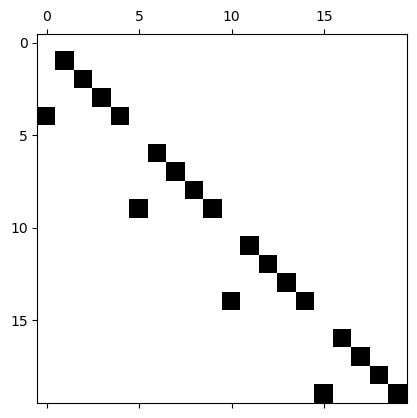

In [22]:
plt.spy(mat.todense()[:20,:20])

/tmp/ipykernel_31347/2147992452.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.matshow(mat.todense()[:500,:500]-mat.todense()[:500,:500].T)


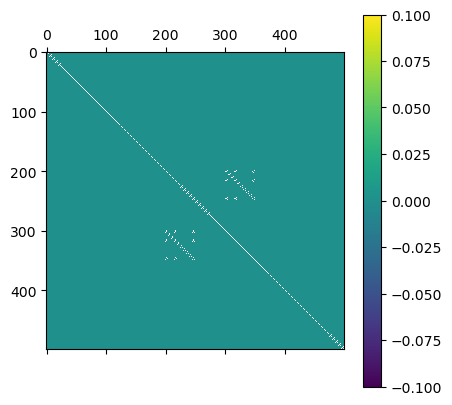

In [9]:
plt.matshow(mat.todense()[:500,:500]-mat.todense()[:500,:500].T)
plt.colorbar()